In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import gaussian_kde
from flaml import AutoML
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

/data/keeling/a/xx24/miniconda3/envs/ml/lib/python3.10/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [2]:
!hostname

keeling-gpu09


In [3]:
PartMC_data = pd.read_csv('/data/keeling/a/xx24/e/proj_ml/merged_data.csv')  # Load the CSV file into a DataFrame called PartMC_data
PartMC_data

,Scenario_ID,DayofYear,Time(hr),temperature,relative_humidity,ccn_01,ccn_03,ccn_06,ccn_1,so2,...,cl,nh4,co3,na,ca,oin,oc,bc,h2o,soa
0,1,225,0,302.049,0.7237,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1,225,1,302.049,0.7237,1.468775e+07,4.547118e+07,1.259830e+08,2.151191e+08,2.302264,...,6.544926e-10,6.138917e-13,0.0,5.013097e-10,0.0,3.768546e-09,3.026901e-10,2.271409e-11,5.467636e-10,6.776734e-13
2,1,225,2,302.049,0.7237,3.513232e+07,1.523761e+08,3.174936e+08,4.444014e+08,3.939677,...,9.358388e-10,5.468201e-12,0.0,7.682238e-10,0.0,5.612803e-09,4.627271e-10,3.153085e-11,1.329707e-09,7.889884e-12
3,1,225,3,302.049,0.7237,5.418828e+07,2.532292e+08,4.860498e+08,6.268316e+08,4.718742,...,1.001659e-09,2.009409e-11,0.0,8.857611e-10,0.0,6.723383e-09,5.344796e-10,3.916841e-11,2.025111e-09,2.969322e-11
4,1,225,4,302.049,0.7237,1.026173e+08,4.473091e+08,7.284921e+08,8.141833e+08,5.500741,...,1.106087e-09,5.223334e-11,0.0,1.047227e-09,0.0,7.797350e-09,6.321834e-10,4.708956e-11,2.887347e-09,8.373608e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2000,211,20,206.642,0.9094,1.811757e+09,9.283165e+09,2.155505e+10,3.236189e+10,2.373614,...,1.879992e-07,1.253051e-09,0.0,1.342675e-07,0.0,0.000000e+00,2.977426e-08,3.016640e-09,2.055370e-06,2.086766e-11
49996,2000,211,21,206.642,0.9094,1.733120e+09,8.812189e+09,2.093083e+10,3.063856e+10,2.248823,...,1.790544e-07,1.210851e-09,0.0,1.278711e-07,0.0,0.000000e+00,2.845797e-08,2.941040e-09,1.949266e-06,1.984972e-11
49997,2000,211,22,206.642,0.9094,1.651679e+09,8.553094e+09,2.068105e+10,2.960230e+10,2.130593,...,1.716141e-07,1.169001e-09,0.0,1.225533e-07,0.0,0.000000e+00,2.727202e-08,2.816278e-09,1.867576e-06,1.891205e-11
49998,2000,211,23,206.642,0.9094,1.586212e+09,8.566176e+09,1.986817e+10,2.797946e+10,2.018579,...,1.634754e-07,1.130442e-09,0.0,1.167437e-07,0.0,0.000000e+00,2.611853e-08,2.776562e-09,1.771535e-06,1.810090e-11


In [ ]:
missing_values = PartMC_data.isnull().sum()
print(missing_values)

Scenario_ID          0
DayofYear            0
Time(hr)             0
temperature          0
relative_humidity    0
ccn_01               0
ccn_03               0
ccn_06               0
ccn_1                0
so2                  0
no2                  0
no                   0
nh3                  0
co                   0
ch3oh                0
ald2                 0
anol                 0
aone                 0
dms                  0
eth                  0
hcho                 0
isop                 0
olei                 0
olet                 0
par                  0
tol                  0
xyl                  0
so4                  0
no3                  0
cl                   0
nh4                  0
co3                  0
na                   0
ca                   0
oin                  0
oc                   0
bc                   0
h2o                  0
soa                  0
dtype: int64


In [ ]:
splitter = GroupShuffleSplit(test_size=0.3, n_splits=1, random_state=42)
train_idxs, test_idxs = next(splitter.split(PartMC_data, groups=PartMC_data['Scenario_ID']))

train, test = PartMC_data.iloc[train_idxs], PartMC_data.iloc[test_idxs]

In [6]:
train_ids = set(train['Scenario_ID'])
test_ids = set(test['Scenario_ID'])

overlap_ids = train_ids.intersection(test_ids)

if overlap_ids:
    print("Error: The following Scenario_IDs are found in both training and testing sets:", overlap_ids)
else:
    print("Success: No Scenario_IDs are split between training and testing sets.")

Success: No Scenario_IDs are split between training and testing sets.


In [7]:
def calculate_metrics_and_plot(y_true, y_pred, var):
    # Calculate R2, RMSE, MAE
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    r2 = 1 - mse/np.mean((y_true - np.mean(y_true)) ** 2)
    mae = np.mean(np.abs(y_true - y_pred))

    # Print the calculated metrics
    print(f'MSE:{mse}')
    print(f'R2: {r2}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')

    # Calculate point density
    xy = np.vstack([y_true, y_pred])
    z = gaussian_kde(xy)(xy)

    # Plot y_true vs y_pred density scatter plot
    plt.figure(figsize=(8, 7))

    scatter = plt.scatter(y_true, y_pred, c=z, s=20, cmap='rainbow')

    # Create color bar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Density', fontsize=17)  # Set the color bar label and fontsize
    cbar.ax.tick_params(labelsize=16)  # Set the font size for the color bar ticks

    # Plot a reference line (ideal prediction line y_true = y_pred)
    plt.plot([1e5, 1e12], [1e5, 1e12], 'r--', lw=2)
    plt.xlim(1e5, 1e12)
    plt.ylim(1e5, 1e12)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel(f'Actual {var}', fontsize=17)
    plt.ylabel(f'Predicted {var}', fontsize=17)
    plt.tick_params(axis='both', which='major', direction='in', length=6, width=2, colors='black',
                    grid_color='gray', grid_alpha=0.7, labelsize=16)

    # Annotate with the metrics in the top left corner
    # metrics_text = f'R$^2$: {r2:.4f}\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}'
    # plt.text(0.05, 0.95, metrics_text, transform=plt.gca().transAxes,
    #          fontsize=14,  # Adjust the font size
    #          verticalalignment='top', horizontalalignment='left',
    #          bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.5'))

    plt.title('Actual vs Predicted Scatter Plot with Density', fontsize=15)
    plt.grid(True)
    plt.show()

Index(['temperature', 'relative_humidity', 'ccn_01', 'ccn_03', 'ccn_06',
       'ccn_1', 'so2', 'no2', 'no', 'nh3', 'co', 'ch3oh', 'ald2', 'anol',
       'aone', 'dms', 'eth', 'hcho', 'isop', 'olei', 'olet', 'par', 'tol',
       'xyl', 'so4', 'no3', 'cl', 'nh4', 'co3', 'na', 'ca', 'oin', 'oc', 'bc',
       'h2o', 'soa'],
      dtype='object')

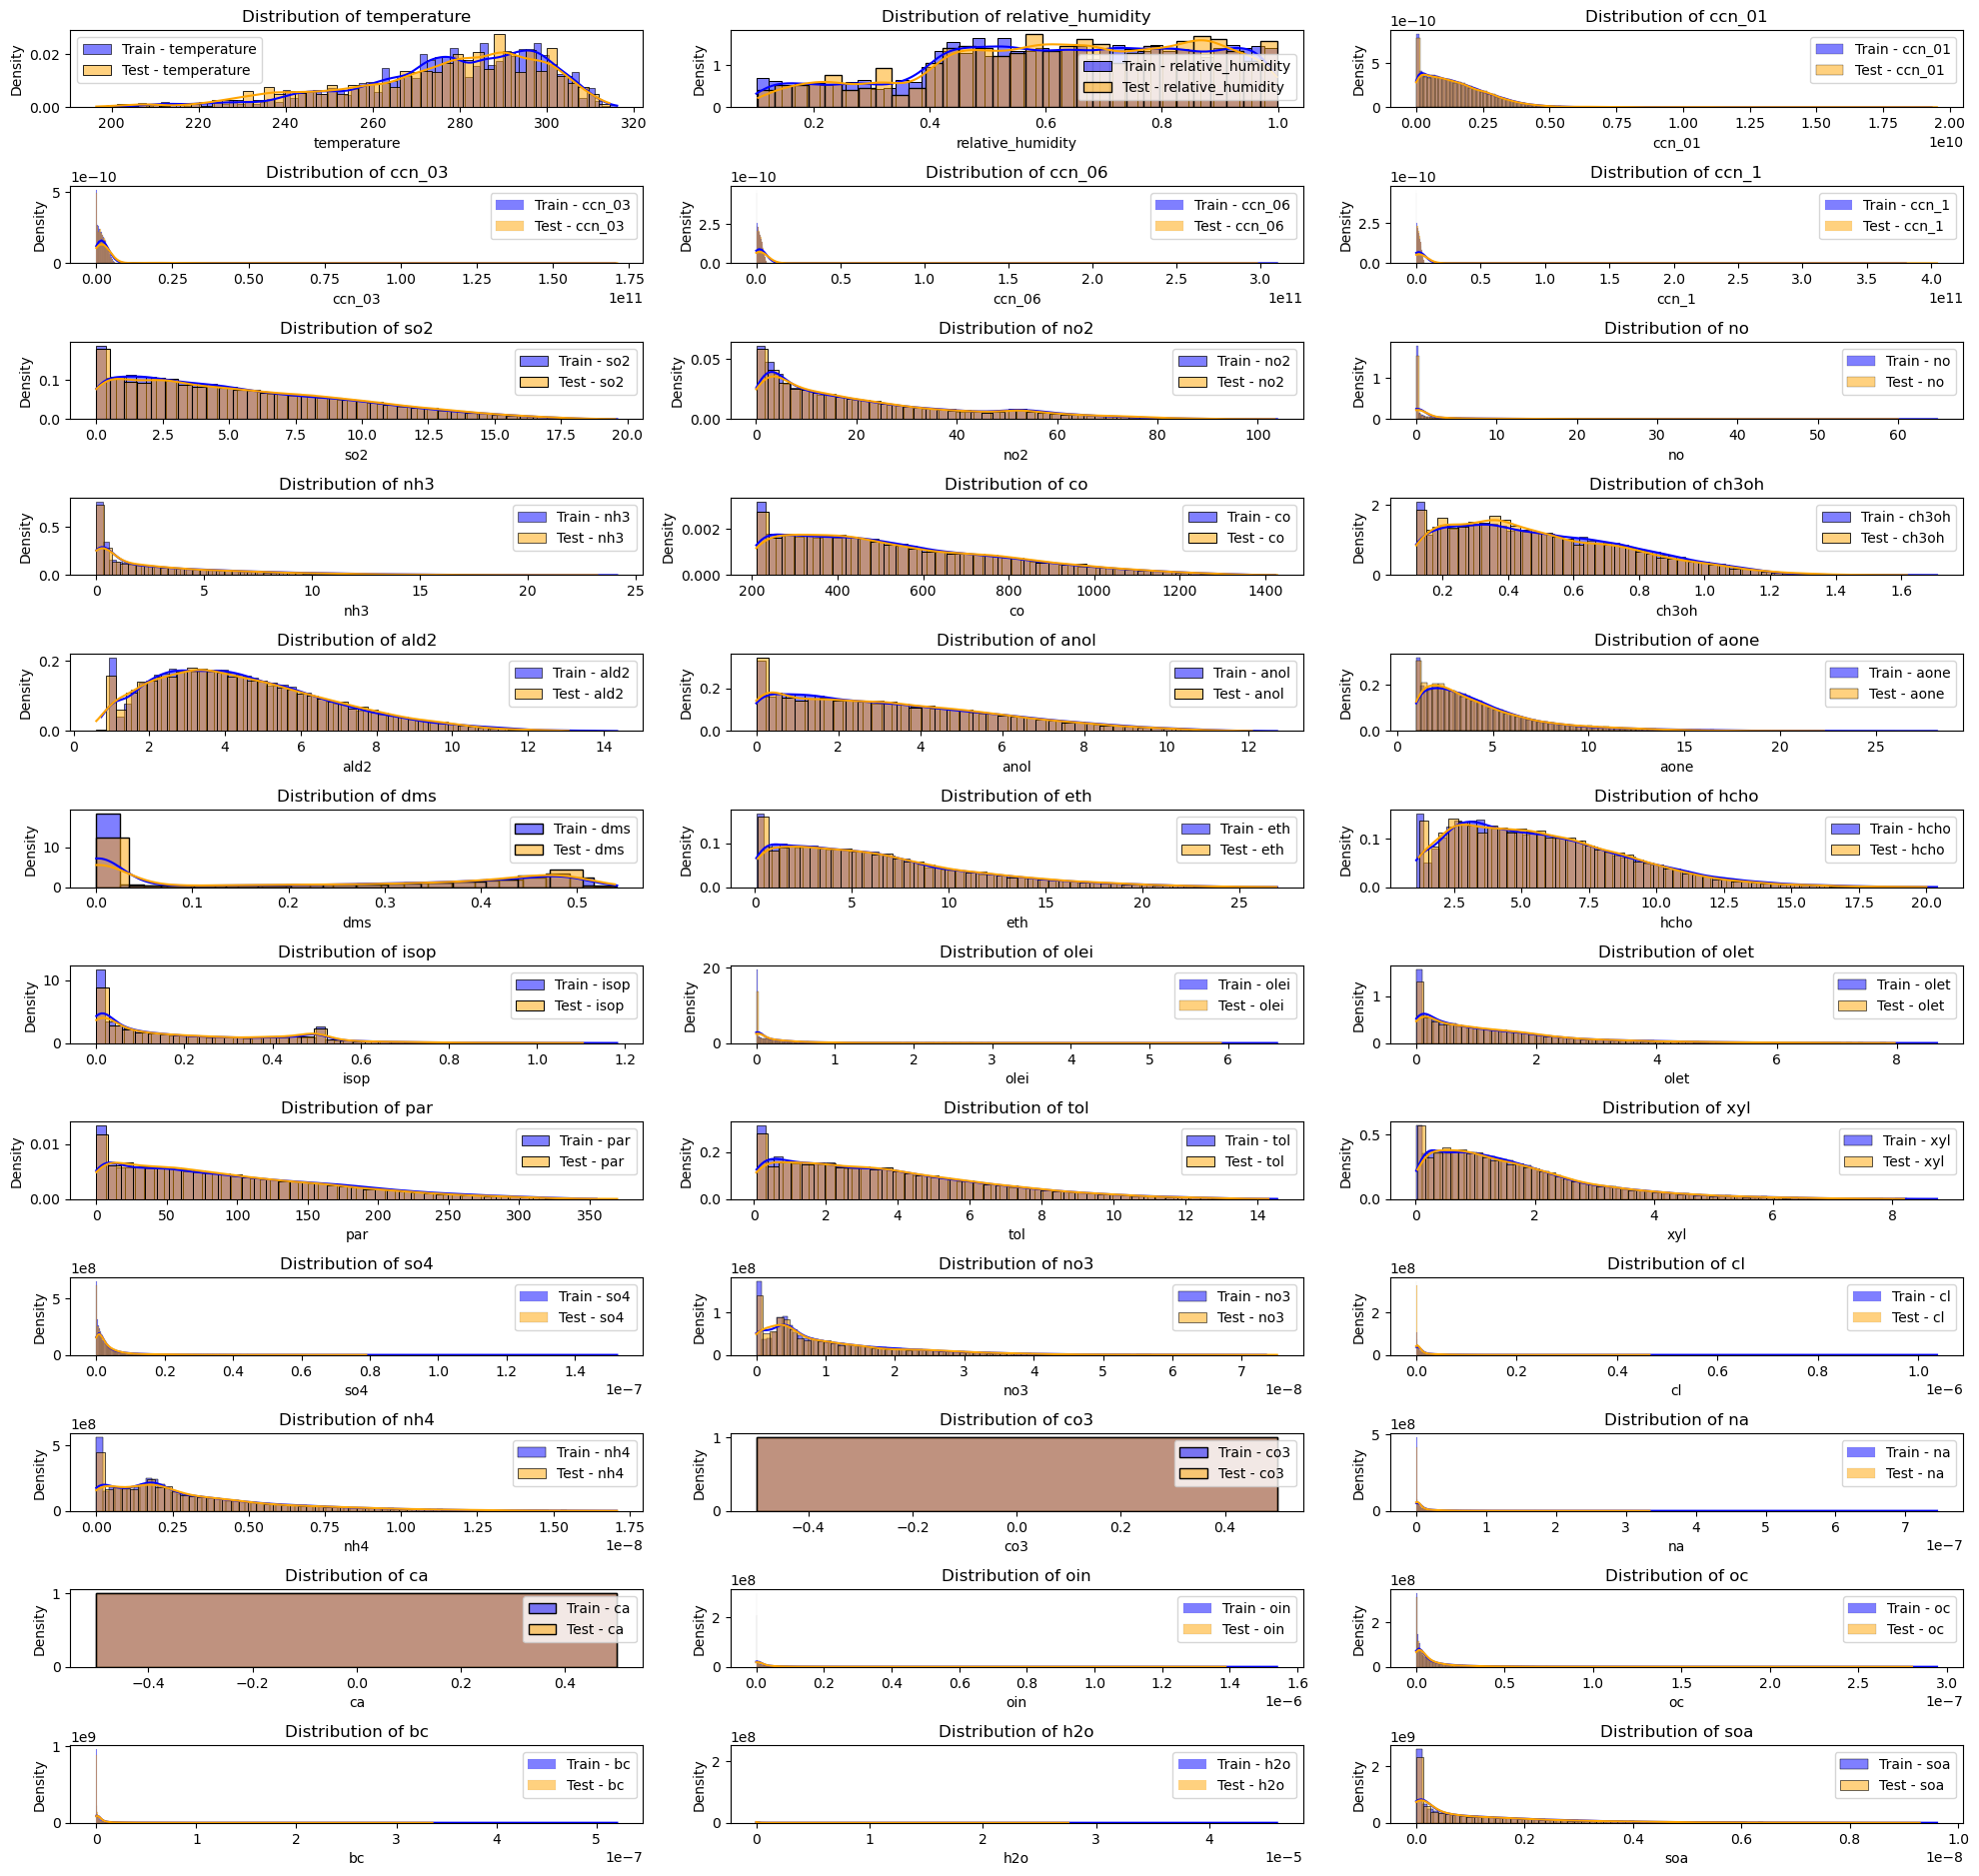

In [8]:
features_to_plot = train.columns[3:]
print(features_to_plot)

plt.figure(figsize=(20, 20))

for i, feature in enumerate(features_to_plot):
    plt.subplot(len(features_to_plot) // 3 + 1, 3, i + 1)
    sns.histplot(train[feature], kde=True, color='blue', label=f'Train - {feature}', stat='density', common_norm=False, alpha=0.5)
    sns.histplot(test[feature], kde=True, color='orange', label=f'Test - {feature}', stat='density', common_norm=False, alpha=0.5)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
input_list = ['temperature','relative_humidity','so2','no2','no','nh3','co','ch3oh','ald2','anol','aone','dms','eth','hcho','isop','olei','olet','par','tol','xyl','so4','no3','cl','nh4','co3','na','ca','oin','oc','bc','h2o']
output_list = ['ccn_03']

X_train = train[input_list]
y_train = np.log1p(train[output_list].squeeze())  # Transform target variable
X_test = test[input_list]
y_test = np.log1p(test[output_list].squeeze())    # Transform target variable

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# ['xgboost', 'xgb_limitdepth', 'rf', 'lgbm', 'lgbm_spark', 'rf_spark', 'lrl1', 'lrl2', 'catboost', 'extra_tree', 'kneighbor', 'transformer', 'transformer_ms', 'histgb', 'svc', 'sgd', 'nb_spark', 'enet', 'lassolars', 'glr_spark', 'lr_spark', 'svc_spark', 'gbt_spark', 'aft_spark']

In [12]:
automl = AutoML(random_state=42)
n_jobs = 8
time_budget = 600 # in seconds

automl_settings = {
    "time_budget": time_budget,  # Maximum time allowed for the AutoML process
    "metric": 'r2',  # Metric used to evaluate the models ('mse' for regression)
    "task": 'regression',  # Specify the type of task ('regression' in this case)
    "eval_method": "cv",  # Evaluation method ('cv' stands for cross-validation)
    "n_splits": 10,  # Number of splits for cross-validation
    "estimator_list": [  # List of models to consider
        "lgbm",       # LightGBM
        "xgboost",    # XGBoost
        "rf",         # Random Forest
        "extra_tree", # Extra Trees
        "catboost"  # Uncomment to include CatBoost
    ],
    "n_jobs": n_jobs,  
    "log_file_name": '/data/keeling/a/xx24/e/proj_ml/AutoML_emulator.log',  
}

automl.fit(X_train=X_train_scaled, y_train=y_train, **automl_settings)
print("Best estimator:", automl.model.estimator)

joblib.dump(automl.model.estimator, "/data/keeling/a/xx24/e/proj_ml/AutoML_emulator.pkl")

[flaml.automl.logger: 03-25 12:56:28] {1728} INFO - task = regression
[flaml.automl.logger: 03-25 12:56:28] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 03-25 12:56:28] {1838} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 03-25 12:56:28] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'xgboost', 'rf', 'extra_tree', 'catboost']
[flaml.automl.logger: 03-25 12:56:28] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 03-25 12:56:29] {2393} INFO - Estimated sufficient time budget=5977s. Estimated necessary time budget=13s.
[flaml.automl.logger: 03-25 12:56:29] {2442} INFO -  at 0.6s,	estimator lgbm's best error=0.4727,	best estimator lgbm's best error=0.4727
[flaml.automl.logger: 03-25 12:56:29] {2258} INFO - iteration 1, current learner lgbm


[flaml.automl.logger: 03-25 12:56:29] {2442} INFO -  at 1.3s,	estimator lgbm's best error=0.4727,	best estimator lgbm's best error=0.4727
[flaml.automl.logger: 03-25 12:56:29] {2258} INFO - iteration 2, current learner lgbm
[flaml.automl.logger: 03-25 12:56:30] {2442} INFO -  at 1.9s,	estimator lgbm's best error=0.1447,	best estimator lgbm's best error=0.1447
[flaml.automl.logger: 03-25 12:56:30] {2258} INFO - iteration 3, current learner xgboost
[flaml.automl.logger: 03-25 12:56:31] {2442} INFO -  at 2.6s,	estimator xgboost's best error=0.4774,	best estimator lgbm's best error=0.1447
[flaml.automl.logger: 03-25 12:56:31] {2258} INFO - iteration 4, current learner lgbm
[flaml.automl.logger: 03-25 12:56:31] {2442} INFO -  at 3.3s,	estimator lgbm's best error=0.0381,	best estimator lgbm's best error=0.0381
[flaml.automl.logger: 03-25 12:56:31] {2258} INFO - iteration 5, current learner lgbm
[flaml.automl.logger: 03-25 12:56:32] {2442} INFO -  at 3.9s,	estimator lgbm's best error=0.0381,	

['/data/keeling/a/xx24/e/proj_ml/AutoML_emulator.pkl']

MSE:3.227206442672481e+19
R2: 0.8667154907426582
RMSE: 5680850678.087289
MAE: 2007218877.7774649


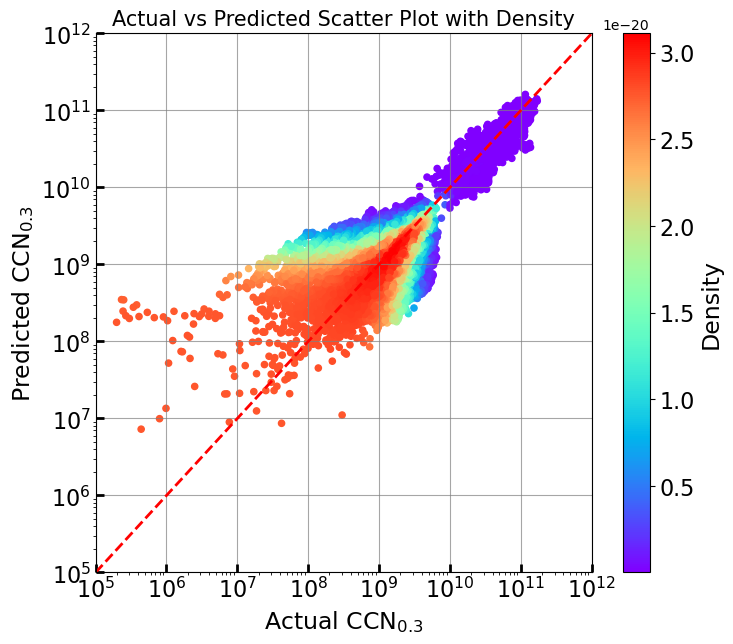

In [13]:
# Reverse transformation
y_pred_transformed = automl.predict(X_test_scaled)
y_pred = np.expm1(y_pred_transformed)  
y_test_raw = np.expm1(y_test)

calculate_metrics_and_plot(y_test_raw, y_pred, 'CCN$_{0.3}$')